In [43]:
# pip install torch

In [47]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn

In [6]:
# List of stock tickers 
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'INTC', 'NVDA', 'META', 'CSCO', 'TSLA', 
           'ORCL', 'IBM', 'CRM', 'TSM', 'ADBE', 'QCOM', 'TCEHY', 'AVGO', 'BABA']

# Create an empty dataframe to store the stok data
stock_data = pd.DataFrame()

# Loop through each ticker and download the historical data
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start='2013-01-01', end='2023-01-01')['Adj Close']

# Display the first 5 rows of the dataframe
stock_data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,AAPL,MSFT,AMZN,GOOGL,INTC,NVDA,META,CSCO,TSLA,ORCL,IBM,CRM,TSM,ADBE,QCOM,TCEHY,AVGO,BABA
Date,,,,,,,,,,,,,,,,,,
2013-01-02,16.791180,22.620344,12.8655,18.099348,15.545009,2.936478,28.000000,14.659075,2.357333,29.590910,122.393822,42.792500,13.344383,38.340000,48.059746,6.169181,24.458391,NaN
2013-01-03,16.579245,22.317308,12.9240,18.109859,15.501388,2.938787,27.770000,14.738352,2.318000,29.266771,121.720673,42.177502,13.337011,37.750000,47.837074,6.114100,24.586170,NaN
2013-01-04,16.117428,21.899633,12.9575,18.467718,15.385050,3.035746,28.760000,14.759978,2.293333,29.522673,120.922737,42.402500,13.241165,38.130001,47.131947,6.145312,24.428326,NaN
2013-01-07,16.022623,21.858685,13.4230,18.387136,15.450491,2.948022,29.420000,14.623038,2.289333,29.369131,120.392845,42.244999,13.049479,37.939999,47.510483,6.059019,24.293028,NaN
2013-01-08,16.065746,21.744015,13.3190,18.350851,15.334163,2.883381,29.059999,14.637453,2.245333,29.377655,120.224586,42.492500,12.931517,38.139999,47.436256,6.031477,24.127666,NaN


**1.) Caculate the change in price of the stock over time**

In [9]:
# daily price change for each stock
stock_data_diff = stock_data.diff()

# Display the first 5 rows of the original and difference Dataframes 
print("Original Dataframe:")
display(stock_data.head())
print("\nDaily Price Change:")
display(stock_data_diff.head())

Original Dataframe:


,AAPL,MSFT,AMZN,GOOGL,INTC,NVDA,META,CSCO,TSLA,ORCL,IBM,CRM,TSM,ADBE,QCOM,TCEHY,AVGO,BABA
Date,,,,,,,,,,,,,,,,,,
2013-01-02,16.791180,22.620344,12.8655,18.099348,15.545009,2.936478,28.000000,14.659075,2.357333,29.590910,122.393822,42.792500,13.344383,38.340000,48.059746,6.169181,24.458391,NaN
2013-01-03,16.579245,22.317308,12.9240,18.109859,15.501388,2.938787,27.770000,14.738352,2.318000,29.266771,121.720673,42.177502,13.337011,37.750000,47.837074,6.114100,24.586170,NaN
2013-01-04,16.117428,21.899633,12.9575,18.467718,15.385050,3.035746,28.760000,14.759978,2.293333,29.522673,120.922737,42.402500,13.241165,38.130001,47.131947,6.145312,24.428326,NaN
2013-01-07,16.022623,21.858685,13.4230,18.387136,15.450491,2.948022,29.420000,14.623038,2.289333,29.369131,120.392845,42.244999,13.049479,37.939999,47.510483,6.059019,24.293028,NaN
2013-01-08,16.065746,21.744015,13.3190,18.350851,15.334163,2.883381,29.059999,14.637453,2.245333,29.377655,120.224586,42.492500,12.931517,38.139999,47.436256,6.031477,24.127666,NaN



Daily Price Change:


,AAPL,MSFT,AMZN,GOOGL,INTC,NVDA,META,CSCO,TSLA,ORCL,IBM,CRM,TSM,ADBE,QCOM,TCEHY,AVGO,BABA
Date,,,,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.211935,-0.303036,0.058499,0.010511,-0.043621,0.002309,-0.230000,0.079277,-0.039333,-0.324139,-0.673149,-0.614998,-0.007372,-0.590000,-0.222672,-0.055081,0.127779,NaN
2013-01-04,-0.461817,-0.417675,0.033501,0.357859,-0.116338,0.096959,0.990000,0.021626,-0.024667,0.255901,-0.797935,0.224998,-0.095846,0.380001,-0.705128,0.031212,-0.157845,NaN
2013-01-07,-0.094805,-0.040949,0.465500,-0.080582,0.065441,-0.087724,0.660000,-0.136940,-0.004000,-0.153542,-0.529892,-0.157501,-0.191686,-0.190002,0.378536,-0.086294,-0.135298,NaN
2013-01-08,0.043123,-0.114670,-0.104000,-0.036285,-0.116328,-0.064641,-0.360001,0.014415,-0.044000,0.008524,-0.168259,0.247501,-0.117963,0.200001,-0.074226,-0.027542,-0.165361,NaN


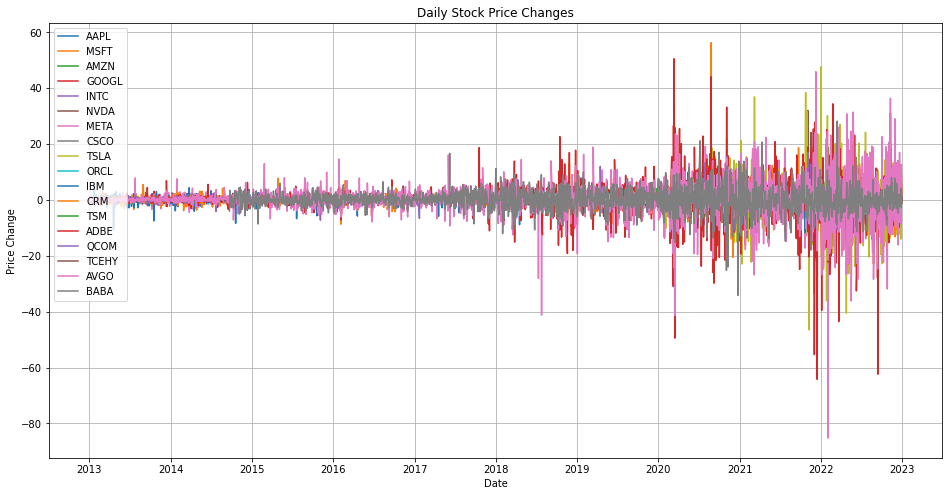

In [20]:
# Plot the daily price change for each stock
plt.figure(figsize=(16,8))
for ticker in tickers:
    plt.plot(stock_data_diff.index, stock_data_diff[ticker], label=ticker)

plt.title('Daily Stock Price Changes')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.legend()
plt.grid(True)
plt.show()

**2.) Calculate the daily return of the stock on average**

In [22]:
# Calculate the daily returns for each stock
daily_returns = stock_data.pct_change()

# Calculate the average daily return for each stock
average_daily_return = daily_returns.mean()

print("Average Daily Return:", "\n", average_daily_return)

Average Daily Return: 
 AAPL     0.000979
MSFT     0.001081
AMZN     0.000956
GOOGL    0.000774
INTC     0.000392
NVDA     0.001940
META     0.000870
CSCO     0.000587
TSLA     0.002217
ORCL     0.000528
IBM      0.000151
CRM      0.000689
TSM      0.000852
ADBE     0.001061
QCOM     0.000558
TCEHY    0.001024
AVGO     0.001477
BABA     0.000311
dtype: float64


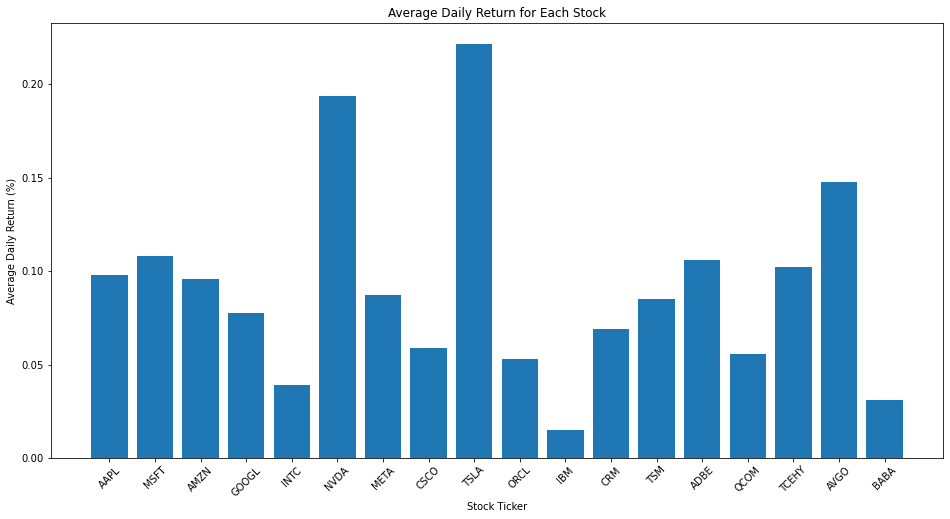

In [24]:
# Plot histogram for each ticker 
plt.figure(figsize=(16,8))
plt.bar(average_daily_return.index, average_daily_return.values*100) # multiply by 100 to convert to %
plt.xlabel('Stock Ticker')
plt.ylabel('Average Daily Return (%)')
plt.title('Average Daily Return for Each Stock')
plt.xticks(rotation=45) # Rotate x-axis labels for better visibility
plt.show()

**3.) Calculate the moving average of the various stocks**

Pandas has a built-in rolling mean calculattor. This will calculate the average over a given period of time. Let's calculate a 50 day moving average of the stock. 

In [29]:
# Calculate the 50-day movinng average for each stock
moving_average_50 = stock_data.rolling(window=50).mean()
print("50-Day Moving Average:", "\n", moving_average_50.head(60)) # Display the first 60 rows to see some non-NaN values

50-Day Moving Average: 
                  AAPL       MSFT      AMZN      GOOGL       INTC      NVDA  \
Date                                                                         
2013-01-02        NaN        NaN       NaN        NaN        NaN       NaN   
2013-01-03        NaN        NaN       NaN        NaN        NaN       NaN   
2013-01-04        NaN        NaN       NaN        NaN        NaN       NaN   
2013-01-07        NaN        NaN       NaN        NaN        NaN       NaN   
2013-01-08        NaN        NaN       NaN        NaN        NaN       NaN   
2013-01-09        NaN        NaN       NaN        NaN        NaN       NaN   
2013-01-10        NaN        NaN       NaN        NaN        NaN       NaN   
2013-01-11        NaN        NaN       NaN        NaN        NaN       NaN   
2013-01-14        NaN        NaN       NaN        NaN        NaN       NaN   
2013-01-15        NaN        NaN       NaN        NaN        NaN       NaN   
2013-01-16        NaN        NaN       

Let's calculate 20-day moving average of the stock.

In [30]:
# Calculate the 20-day movinng average for each stock
moving_average_20 = stock_data.rolling(window=20).mean()
print("20-Day Moving Average:", "\n", moving_average_20.head(60)) # Display the first 60 rows to see some non-NaN values

20-Day Moving Average: 
                  AAPL       MSFT       AMZN      GOOGL       INTC      NVDA  \
Date                                                                          
2013-01-02        NaN        NaN        NaN        NaN        NaN       NaN   
2013-01-03        NaN        NaN        NaN        NaN        NaN       NaN   
2013-01-04        NaN        NaN        NaN        NaN        NaN       NaN   
2013-01-07        NaN        NaN        NaN        NaN        NaN       NaN   
2013-01-08        NaN        NaN        NaN        NaN        NaN       NaN   
2013-01-09        NaN        NaN        NaN        NaN        NaN       NaN   
2013-01-10        NaN        NaN        NaN        NaN        NaN       NaN   
2013-01-11        NaN        NaN        NaN        NaN        NaN       NaN   
2013-01-14        NaN        NaN        NaN        NaN        NaN       NaN   
2013-01-15        NaN        NaN        NaN        NaN        NaN       NaN   
2013-01-16        NaN      

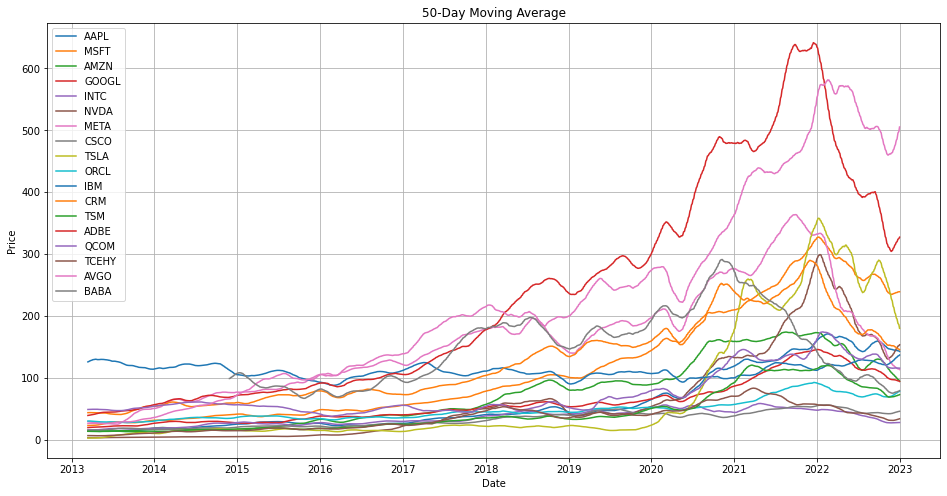

In [31]:
# Plot the 50-day moving average for each stock
plt.figure(figsize=(16,8))
for ticker in tickers:
    plt.plot(moving_average_50.index, moving_average_50[ticker], label=ticker)

plt.title('50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

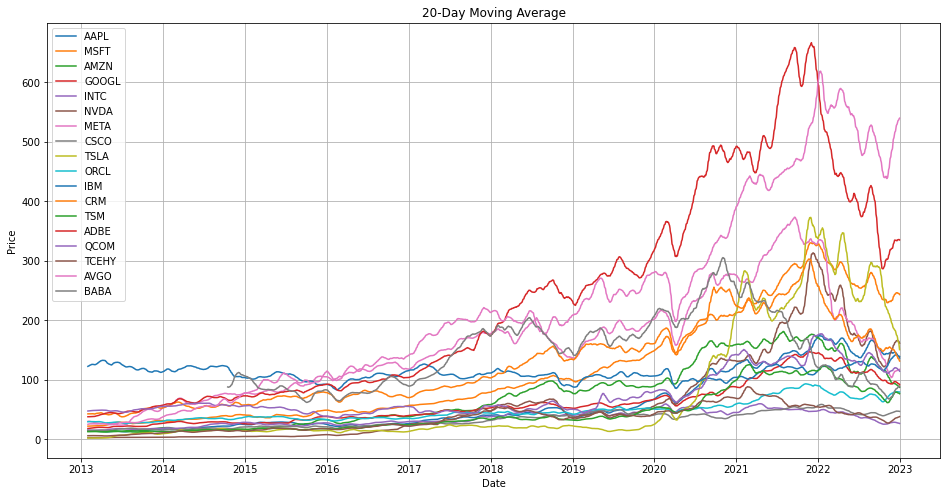

In [32]:
# Plot the 20-day moving average for each stock
plt.figure(figsize=(16,8))
for ticker in tickers:
    plt.plot(moving_average_20.index, moving_average_20[ticker], label=ticker)

plt.title('20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

**4.) Calculate the correlation between different stocks' closing prices**

In [33]:
# Calculate the correlation matrix for stock prices
correlation_matrix = stock_data.corr()
print("Correlation Matrix:", "\n", correlation_matrix)

Correlation Matrix: 
            AAPL      MSFT      AMZN     GOOGL      INTC      NVDA      META  \
AAPL   1.000000  0.983051  0.903257  0.963919  0.633307  0.959773  0.773171   
MSFT   0.983051  1.000000  0.944000  0.980315  0.725068  0.962921  0.835744   
AMZN   0.903257  0.944000  1.000000  0.923197  0.847384  0.890286  0.925422   
GOOGL  0.963919  0.980315  0.923197  1.000000  0.713802  0.973747  0.857801   
INTC   0.633307  0.725068  0.847384  0.713802  1.000000  0.635461  0.876819   
NVDA   0.959773  0.962921  0.890286  0.973747  0.635461  1.000000  0.807347   
META   0.773171  0.835744  0.925422  0.857801  0.876819  0.807347  1.000000   
CSCO   0.825180  0.889254  0.909829  0.885885  0.861273  0.826338  0.856992   
TSLA   0.952314  0.918000  0.809213  0.923302  0.486675  0.942732  0.686966   
ORCL   0.948553  0.964364  0.886819  0.972910  0.676446  0.951858  0.823488   
IBM    0.238817  0.186331  0.009596  0.203013 -0.186505  0.243454 -0.081999   
CRM    0.872738  0.924999  0.9

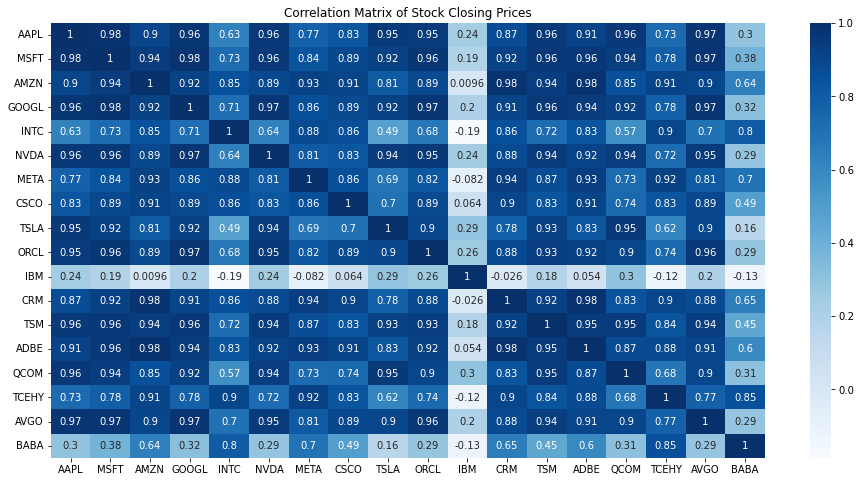

In [37]:
# visulize the correlation matrix using a heatmap
plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix of Stock Closing Prices')
plt.show()

**5.) How much value do we put at risk by investing in a particular stock?**

"Value at risk" (VaR) is a way to estimate the risk of loss for investments. It estimates how much a set of investments might lose under normal market conditions, within a fixed period, and at a given confidence level. 

In [38]:
# Calculate the daily returns 
daily_returns = stock_data.pct_change().dropna()

# Calculate the Value at Risk (VaR) for a 95% confidence interval
VaR_95 = daily_returns.quantile(0.05)

# Assume you've invested $10,000 in each stock. Calculate the VaR in dollars for each stock
investment = 10000
VaR_95_monetary = VaR_95 * investment
print("Value at Risk (VaR) for a 95% confidence interval:", "\n", VaR_95_monetary)

Value at Risk (VaR) for a 95% confidence interval: 
 AAPL    -283.788349
MSFT    -276.085074
AMZN    -316.333173
GOOGL   -270.017945
INTC    -294.632608
NVDA    -448.105022
META    -351.670200
CSCO    -232.758622
TSLA    -515.113714
ORCL    -235.307446
IBM     -215.267787
CRM     -340.836350
TSM     -295.778164
ADBE    -321.729443
QCOM    -345.136168
TCEHY   -367.178274
AVGO    -333.731699
BABA    -381.659461
Name: 0.05, dtype: float64


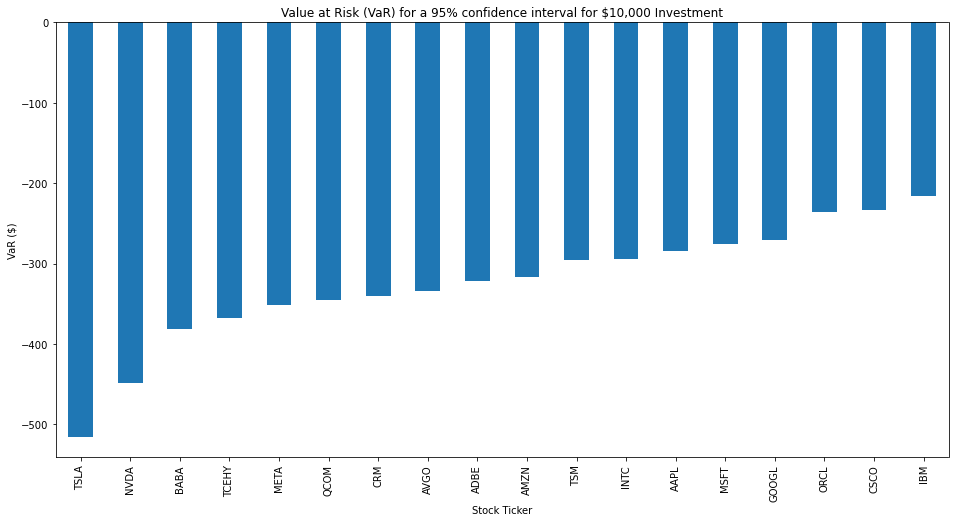

In [40]:
# Plotting the VaR for each stock
plt.figure(figsize=(16,8))
VaR_95_monetary.sort_values().plot(kind='bar')
plt.title('Value at Risk (VaR) for a 95% confidence interval for $10,000 Investment')
plt.xlabel('Stock Ticker')
plt.ylabel('VaR ($)')
plt.show()

**6.) Predict future stock behavior using LSTM, a structure that can be used in Neural Network models.**

[*********************100%***********************]  1 of 1 completed
Epoch [1/100], Loss: 0.0094
Epoch [2/100], Loss: 0.0079
Epoch [3/100], Loss: 0.0066
Epoch [4/100], Loss: 0.0057
Epoch [5/100], Loss: 0.0050
Epoch [6/100], Loss: 0.0047
Epoch [7/100], Loss: 0.0046
Epoch [8/100], Loss: 0.0048
Epoch [9/100], Loss: 0.0050
Epoch [10/100], Loss: 0.0052
Epoch [11/100], Loss: 0.0053
Epoch [12/100], Loss: 0.0053
Epoch [13/100], Loss: 0.0052
Epoch [14/100], Loss: 0.0050
Epoch [15/100], Loss: 0.0049
Epoch [16/100], Loss: 0.0048
Epoch [17/100], Loss: 0.0047
Epoch [18/100], Loss: 0.0046
Epoch [19/100], Loss: 0.0045
Epoch [20/100], Loss: 0.0045
Epoch [21/100], Loss: 0.0046
Epoch [22/100], Loss: 0.0046
Epoch [23/100], Loss: 0.0046
Epoch [24/100], Loss: 0.0046
Epoch [25/100], Loss: 0.0046
Epoch [26/100], Loss: 0.0046
Epoch [27/100], Loss: 0.0046
Epoch [28/100], Loss: 0.0046
Epoch [29/100], Loss: 0.0046
Epoch [30/100], Loss: 0.0045
Epoch [31/100], Loss: 0.0045
Epoch [32/100], Loss: 0.0045
Epoch [33/10

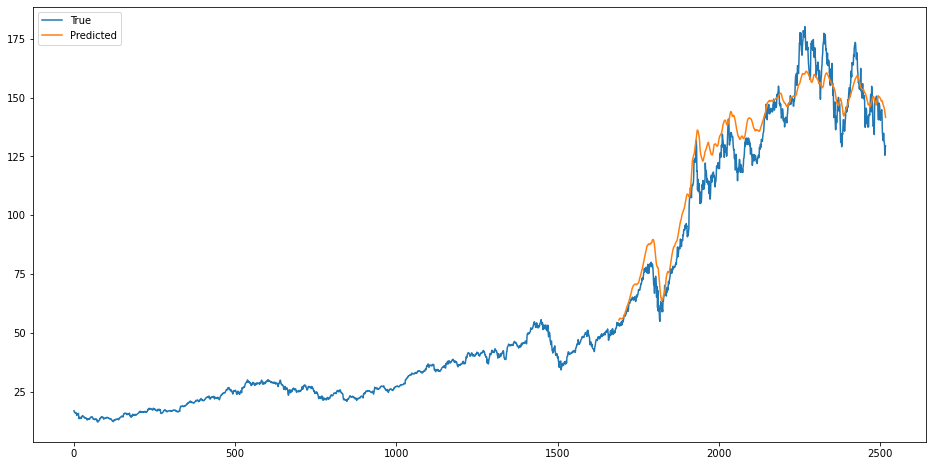

In [52]:
# Download Apple's stock data
stock_data = yf.download('AAPL', start='2013-01-01', end='2023-01-01')['Adj Close'].values
stock_data = stock_data.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
stock_data_normalized = scaler.fit_transform(stock_data)

# Prepare data
seq_length = 10
X, y = [], []
for i in range(len(stock_data_normalized) - seq_length):
    X.append(stock_data_normalized[i:i+seq_length])
    y.append(stock_data_normalized[i+seq_length])

X = np.array(X)
y = np.array(y)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split into training and test sets
train_size = int(0.67 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.linear(out[:, -1, :])
        return out

# Initialize the model, loss function, and optimizer
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1

model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    outputs = model(X_train)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    mse = criterion(test_outputs, y_test)
    print(f'Mean squared error on test data: {mse.item():.4f}')

# Convert predictions back to original scale
test_outputs = scaler.inverse_transform(test_outputs)
y_test = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(16, 8))
plt.plot(stock_data, label='True')
plt.plot(np.arange(len(stock_data) - len(test_outputs), len(stock_data)), test_outputs, label='Predicted')
plt.legend()
plt.show()


**7) How can you make Neural Network model (e.g. LSTM) more interpretable?**

See word document for more details.